/Users/joshzheng/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


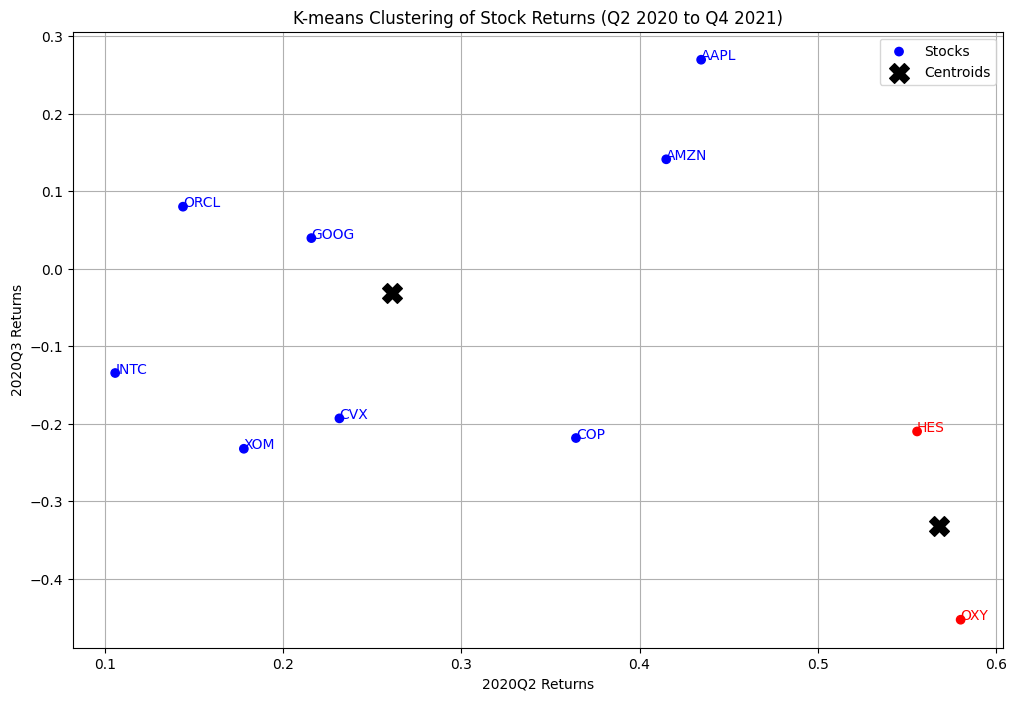

Date  2020-06-30  2020-09-30  2020-12-31  2021-03-31  2021-06-30  2021-09-30  \
AAPL    0.434583    0.269847    0.145756   -0.079433    0.121244    0.033148   
AMZN    0.414983    0.141332    0.034363   -0.050001    0.111852   -0.045091   
COP     0.364286   -0.218467    0.217722    0.324581    0.149707    0.112808   
CVX     0.231438   -0.193097    0.172917    0.240853   -0.000477   -0.031411   
GOOG    0.215684    0.039608    0.192079    0.180806    0.211584    0.063436   
HES     0.555856   -0.209998    0.289763    0.340405    0.234030   -0.105474   
INTC    0.105506   -0.134548   -0.037852    0.284625   -0.122813   -0.050944   
ORCL    0.143596    0.080152    0.083585    0.084712    0.109306    0.119347   
OXY     0.580311   -0.453005    0.729271    0.537839    0.174681   -0.054045   
XOM     0.177772   -0.232335    0.200699    0.354440    0.129858   -0.067533   

Date  2021-12-31  Cluster  
AAPL    0.259364        1  
AMZN    0.026742        1  
COP     0.066549        1  
CVX    

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('pandemic_period.csv')

# Transpose the DataFrame and set the first row as the header
df = df.set_index('Date').T

# Perform K-means clustering
returns = df.values
kmeans = KMeans(n_clusters=2, random_state=0).fit(returns)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add cluster information to the DataFrame
df['Cluster'] = clusters

# Define colors for each cluster
cluster_colors = {0: 'red', 1: 'blue'}

# Map colors to each stock based on cluster
stock_colors = [cluster_colors[cluster] for cluster in clusters]

# Visualize the clustering with centroids
plt.figure(figsize=(12, 8))

# Plot stocks
plt.scatter(returns[:, 0], returns[:, 1], c=stock_colors, marker='o', label='Stocks')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Annotate each stock
for i, stock in enumerate(df.index):
    plt.annotate(stock, (returns[i, 0], returns[i, 1]), color=stock_colors[i])

plt.xlabel('2020Q2 Returns')
plt.ylabel('2020Q3 Returns')
plt.title('K-means Clustering of Stock Returns (Q2 2020 to Q4 2021)')
plt.legend()
plt.grid(True)
plt.show()

# Display the clustered stocks
print(df)
